In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')  
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 1. Check the data types of the columns. Get the numeric data into dataframe called `numerical` and `categorical` columns in a dataframe called categoricals. 

(You can use `np.number` and `np.object` to select the numerical data types and categorical data types respectively)

In [2]:
numerical = data.select_dtypes(include = np.number)

In [3]:
categoricals = data.select_dtypes(include = object)

In [4]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        9134 non-null   float64
 1   Income                         9134 non-null   int64  
 2   Monthly Premium Auto           9134 non-null   int64  
 3   Months Since Last Claim        9134 non-null   int64  
 4   Months Since Policy Inception  9134 non-null   int64  
 5   Number of Open Complaints      9134 non-null   int64  
 6   Number of Policies             9134 non-null   int64  
 7   Total Claim Amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


In [5]:
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer           9134 non-null   object
 1   State              9134 non-null   object
 2   Response           9134 non-null   object
 3   Coverage           9134 non-null   object
 4   Education          9134 non-null   object
 5   Effective To Date  9134 non-null   object
 6   EmploymentStatus   9134 non-null   object
 7   Gender             9134 non-null   object
 8   Location Code      9134 non-null   object
 9   Marital Status     9134 non-null   object
 10  Policy Type        9134 non-null   object
 11  Policy             9134 non-null   object
 12  Renew Offer Type   9134 non-null   object
 13  Sales Channel      9134 non-null   object
 14  Vehicle Class      9134 non-null   object
 15  Vehicle Size       9134 non-null   object
dtypes: object(16)
memory usage: 1.1+ MB


## 2. Now we will try to check the normality of the numerical variables visually
* Use seaborn library to construct distribution plots for the numerical variables
* Use Matplotlib to construct histograms
* Do the distributions for different numerical variables look like a normal distribution

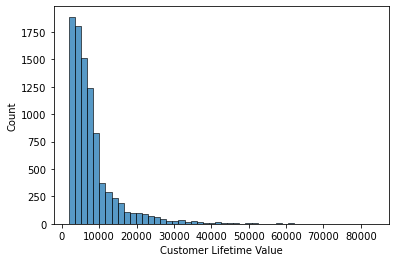

In [6]:
sns.histplot(data = data, x = "Customer Lifetime Value", bins = 50)

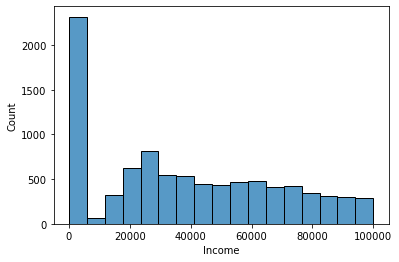

In [7]:
sns.histplot(data = data, x = "Income")

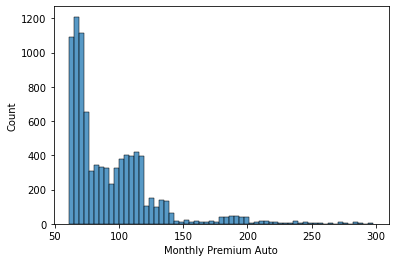

In [8]:
sns.histplot(data = data, x = "Monthly Premium Auto")

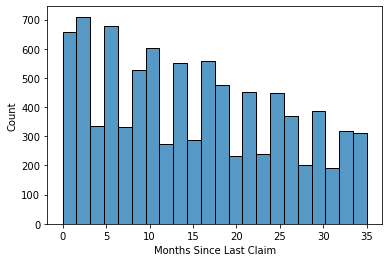

In [9]:
sns.histplot(data = data, x = "Months Since Last Claim")

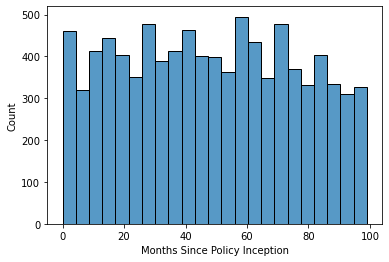

In [10]:
sns.histplot(data = data, x = "Months Since Policy Inception")

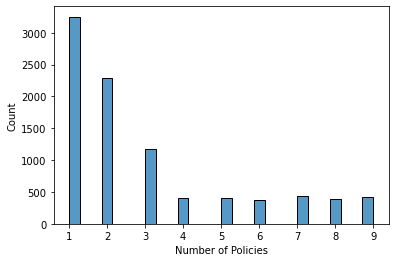

In [11]:
sns.histplot(data = data, x = "Number of Policies")

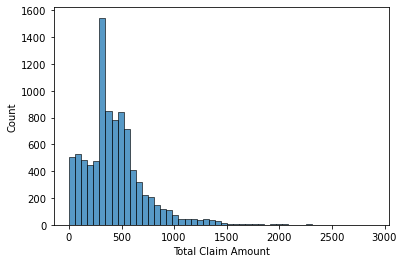

In [12]:
sns.histplot(data = data, x = "Total Claim Amount", bins = 50)

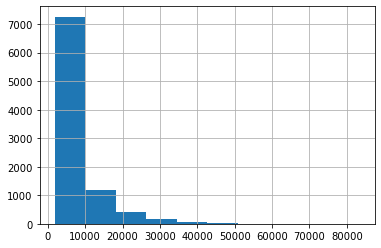

In [13]:
data["Customer Lifetime Value"].hist()
plt.show()

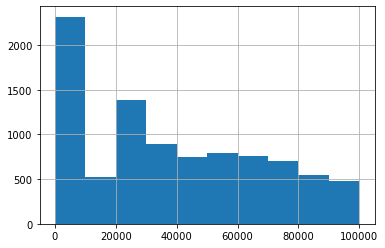

In [14]:
data["Income"].hist()
plt.show()

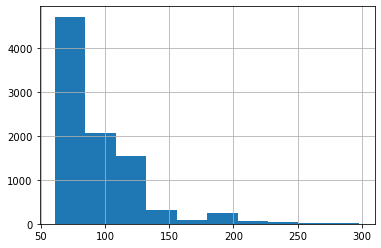

In [16]:
data["Monthly Premium Auto"].hist()
plt.show()

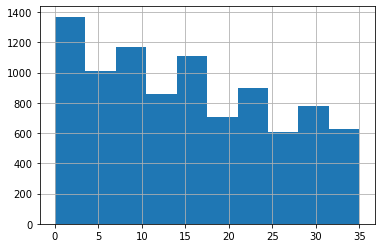

In [17]:
data["Months Since Last Claim"].hist()
plt.show()

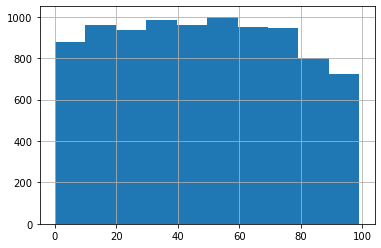

In [18]:
data["Months Since Policy Inception"].hist()
plt.show()

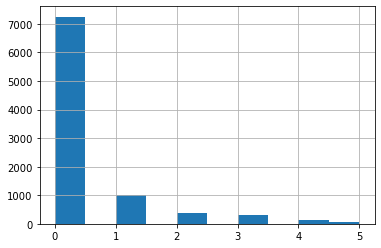

In [19]:
data["Number of Open Complaints"].hist()
plt.show()

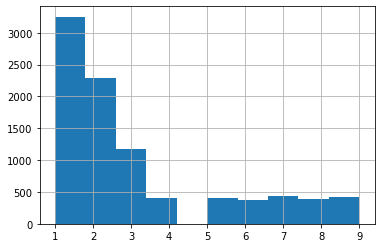

In [20]:
data["Number of Policies"].hist()
plt.show()

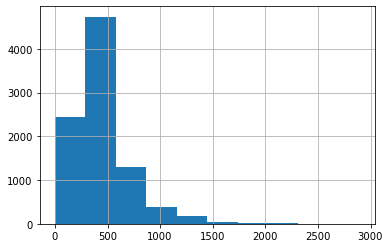

In [21]:
data["Total Claim Amount"].hist()
plt.show()

None of the distributions look like a normal distribution.

## 3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable.

In [22]:
correlations_matrix = numerical.corr()
correlations_matrix

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


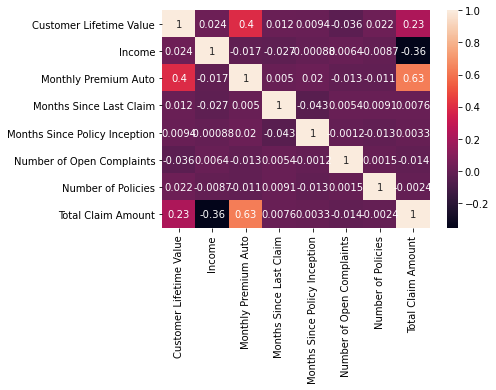

In [23]:
sns.heatmap(correlations_matrix, annot=True)

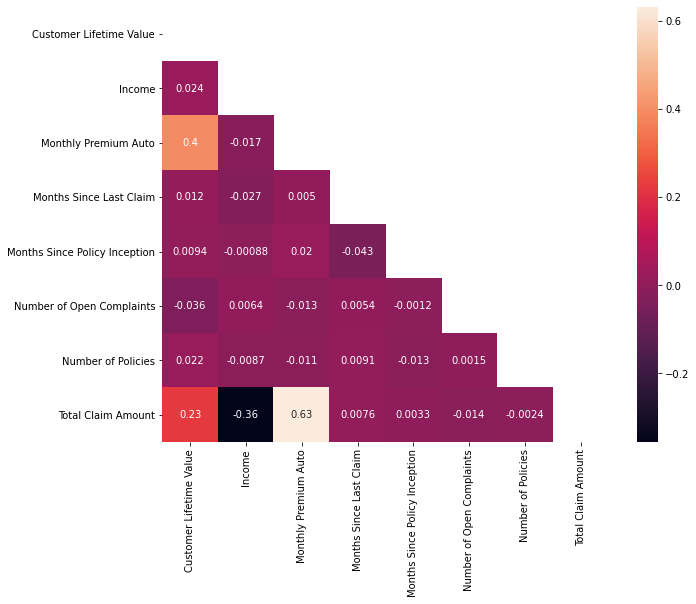

In [24]:
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.heatmap(correlations_matrix, mask = mask, annot=True)
plt.show()